In [118]:
import pickle
data = []
with open("/home/taewook/ros2_ws/src/sensor_fallback_sim/sensor_fallback_sim.pkl", "rb") as f:
    while True:
        try:
            item = pickle.load(f)
            data.append(item)
        except EOFError:
            break
print(len(data))
print(print(data[0].keys()))


508
dict_keys(['t', 'enable', 'score', 'check', 'sensor_order', 'R_total'])
None


[0.2, 13.799999999999967, 14.799999999999963, 18.799999999999997]


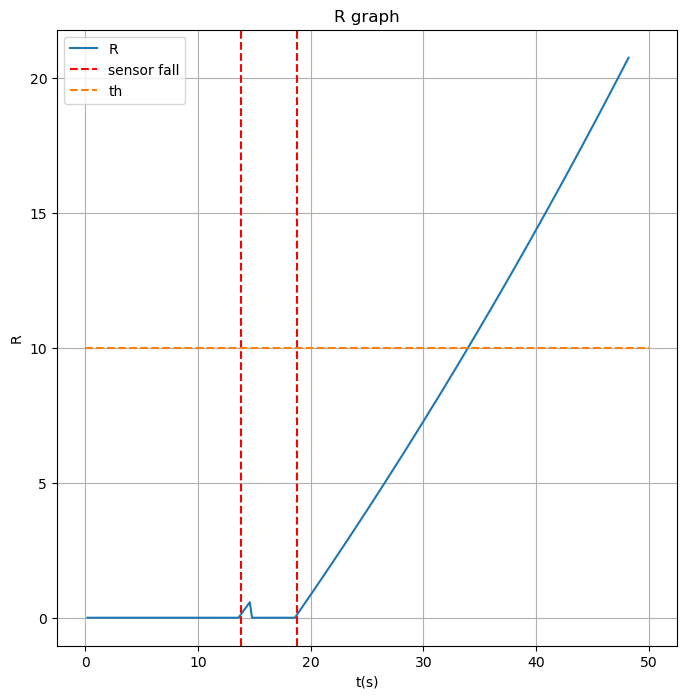

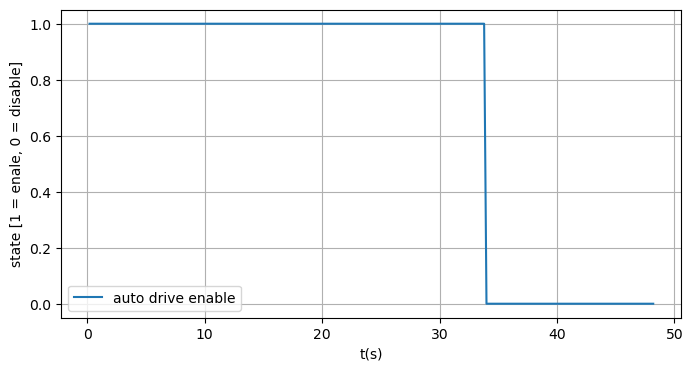

In [48]:
import matplotlib.pyplot as plt
t = []
R_total = []
fall = []
lf = 0
for d in data:
    t.append(d["t"])
    R_total.append(d["R_total"])

    if lf != d["enable"]:
        fall.append(d["t"])
    lf = d["enable"]
y = [-1,5]
x = [0,50]
th = 10
# 그래프 그리기

print(fall)
plt.figure(figsize=(8, 8))  # 가로 8인치, 세로 4인치
plt.plot(t, R_total,label="R")  # 점 찍으려면 marker 추가
sensor_fall_label = True
for i,f in enumerate(fall):
    if i % 2 != 0:
        y_pos = -1
        if sensor_fall_label:
            plt.axvline(x=f, color='red', linestyle='--', label='sensor fall')
            sensor_fall_label=False
        else:
            plt.axvline(x=f, color='red', linestyle='--')
        # plt.plot([f,f], y, linestyle='--',color="red",label="sensor fall")  # 점 찍으려면 marker 추가
        # plt.annotate('sensor fall',
        #             xy=(f, 0),             # 화살표 머리 (표시할 지점)
        #             #xytext=(f, -1),        # 텍스트 + 꼬리 위치 (아래쪽)
        #             #arrowprops=dict(arrowstyle='->', color='red'),  # 화살표 빨간색
        #             color='red')   

         

 
plt.plot(x, [th,th],label="th",linestyle='--')  # 점 찍으려면 marker 추가
plt.title("R graph")
plt.xlabel("t(s)")
plt.ylabel("R")
plt.grid(True)
plt.legend(loc='upper left')

plt.show()

auto = []

for r in R_total:
    if r < th:
        auto.append(1)
    else:
        auto.append(0)
        
plt.figure(figsize=(8, 4))  # 가로 8인치, 세로 4인치
plt.plot(t, auto,label="auto drive enable")  # 점 찍으려면 marker 추가
plt.xlabel("t(s)")
plt.ylabel("state [1 = enale, 0 = disable]")
plt.grid(True)
plt.legend(loc='lower left')
plt.show()



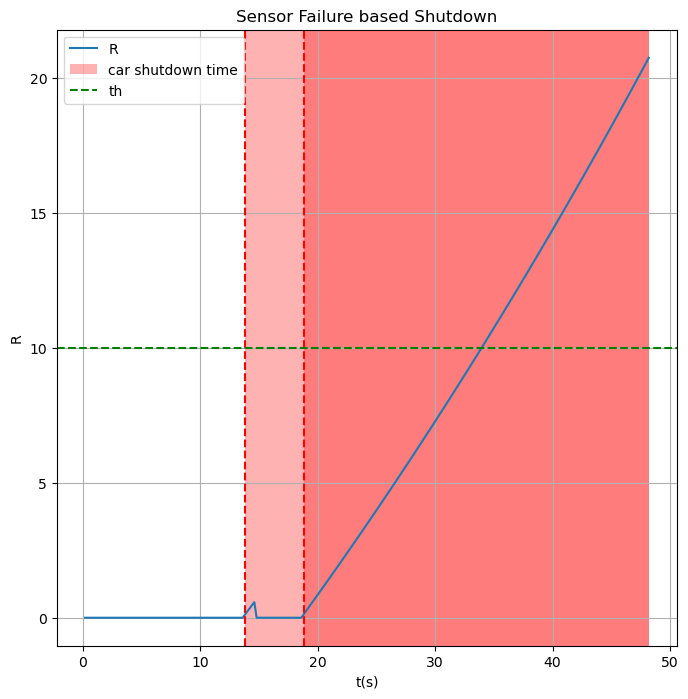

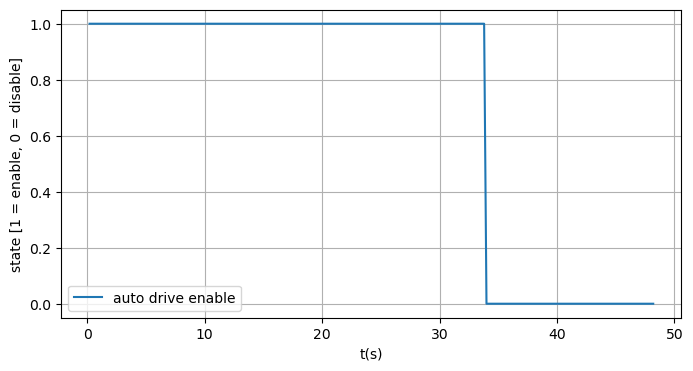

In [54]:
import matplotlib.pyplot as plt

# data 리스트가 있다고 가정 (각 원소는 {"t": ..., "R_total": ..., "enable": ...} 형태)
t = []
R_total = []
fall = []
lf = 0
for d in data:
    t.append(d["t"])
    R_total.append(d["R_total"])
    if lf != d["enable"]:
        fall.append(d["t"])
    lf = d["enable"]

th = 10  # 임계값

plt.figure(figsize=(8, 8))
plt.plot(t, R_total, label="R")

for i,f in enumerate(fall):
    if i % 2 != 0:
        y_pos = -1
        if sensor_fall_label:
            plt.axvline(x=f, color='red', linestyle='--', label='sensor fall')
            sensor_fall_label=False
        else:
            plt.axvline(x=f, color='red', linestyle='--')

# 센서 실패 구간에 대해 투명한 빨간 음영 표시하기
# fall 리스트에서 짝수번째 인덱스는 시작, 홀수번째 인덱스는 끝이라고 가정
sensor_fail_label = True
for i in range(1, len(fall), 2):
    start = fall[i]
    if  R_total[i] > 10: ###################################################################################
        end = fall[i+1]
        if sensor_fail_label:
            plt.axvspan(start, end, facecolor='red', alpha=0.3, label='car shutdown time')
            sensor_fail_label = False
        else:
            plt.axvspan(start, end, facecolor='red', alpha=0.3)
    # 만약 실패 구간의 끝이 누락되었을 경우(end가 없다면) 시작 시점 이후 전체 구간에 음영 표시할 수 있음
    else:
        if sensor_fail_label:
            plt.axvspan(start, t[-1], facecolor='red', alpha=0.3, label='car shutdown time')
            sensor_fail_label = False
        else:
            plt.axvspan(start, t[-1], facecolor='red', alpha=0.3)

# 임계값(th) 라인 표시
plt.axhline(y=th, color='green', linestyle='--', label="th")

plt.title("Sensor Failure based Shutdown")
plt.xlabel("t(s)")
plt.ylabel("R")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


# auto drive enable 상태 그래프
auto = []
for r in R_total:
    if r < th:
        auto.append(1)
    else:
        auto.append(0)
        
plt.figure(figsize=(8, 4))
plt.plot(t, auto, label="auto drive enable")
plt.xlabel("t(s)")
plt.ylabel("state [1 = enable, 0 = disable]")
plt.grid(True)
plt.legend(loc='lower left')
plt.show()


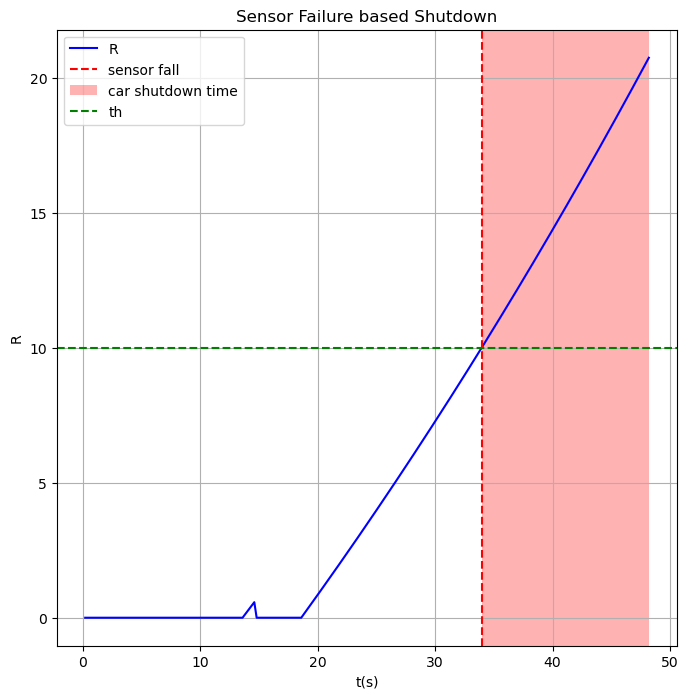

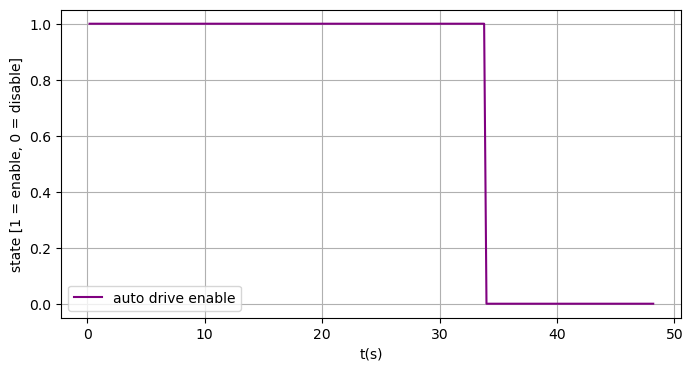

In [62]:
import matplotlib.pyplot as plt

# data 리스트가 있다고 가정 (각 원소는 {"t": ..., "R_total": ..., "enable": ...} 형태)
t = []
R_total = []
fall = []    # enable 상태가 바뀌는 시점 저장
lf = data[0]["enable"]  # 초기 enable 상태

# 데이터 파싱: 시간(t), R_total, 그리고 상태 전환 시점(fall) 기록
for d in data:
    t.append(d["t"])
    R_total.append(d["R_total"])
    if d["enable"] != lf:
        fall.append(d["t"])
    lf = d["enable"]

# 마지막 구간이 종료되지 않았다면, 마지막 t값을 추가
if len(fall) % 2 != 0:
    fall.append(t[-1])

th = 10  # 임계값

plt.figure(figsize=(8, 8))
plt.plot(t, R_total, label="R", color="blue")

# 각 실패 구간마다, 해당 구간에서 R이 th를 초과하는 최초 시점부터 음영을 시작하고,
# 그 최초 시점에 빨간 점선을 한 번만 표시합니다.
shutdown_label_flag = True
sensor_fall_line_flag = True

for i in range(0, len(fall), 2):
    interval_start = fall[i]
    interval_end = fall[i+1]
    
    # 해당 실패 구간 내의 인덱스 찾기
    indices = [idx for idx, time_val in enumerate(t) if interval_start <= time_val <= interval_end]
    if not indices:
        continue
    
    # 구간 내에서 R_total이 th를 초과하는 최초 시점 찾기
    shading_start_time = None
    for idx in indices:
        if R_total[idx] > th:
            shading_start_time = t[idx]
            break
    # 해당 실패 구간 내에 임계치를 초과한 시점이 없으면 건너뜁니다.
    if shading_start_time is None:
        continue
    
    # 해당 실패 구간에서 임계치를 초과한 최초 시점에 빨간 점선(센서 폴 표시)을 그리되,
    # 전체 그래프에서 단 한 번만 범례(label)을 추가합니다.
    if sensor_fall_line_flag:
        plt.axvline(x=shading_start_time, color='red', linestyle='--', label='sensor fall')
        sensor_fall_line_flag = False
    else:
        plt.axvline(x=shading_start_time, color='red', linestyle='--')
        
    # 임계치를 초과한 최초 시점부터 실패 구간의 끝까지 빨간 음영(자율차 정지 구간) 표시
    if shutdown_label_flag:
        plt.axvspan(shading_start_time, interval_end, facecolor='red', alpha=0.3, label='car shutdown time')
        shutdown_label_flag = False
    else:
        plt.axvspan(shading_start_time, interval_end, facecolor='red', alpha=0.3)

# 임계값(th) 라인 표시
plt.axhline(y=th, color='green', linestyle='--', label='th')

plt.title("Sensor Failure based Shutdown")
plt.xlabel("t(s)")
plt.ylabel("R")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

# -----------------------------------------------------
# auto drive enable 상태 그래프: R_total이 임계치 미만이면 1(자율주행 활성), 이상이면 0(정지)
auto = [1 if r < th else 0 for r in R_total]
plt.figure(figsize=(8, 4))
plt.plot(t, auto, label="auto drive enable", color="purple")
plt.xlabel("t(s)")
plt.ylabel("state [1 = enable, 0 = disable]")
plt.grid(True)
plt.legend(loc='lower left')
plt.show()


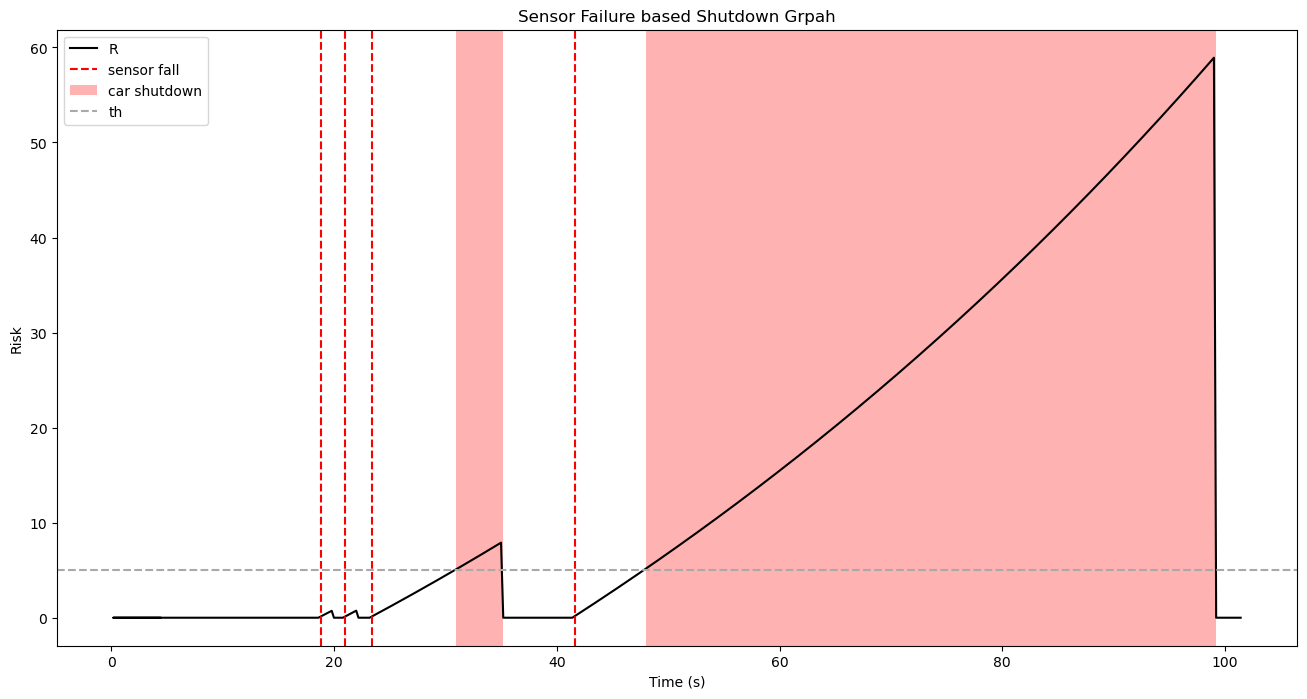

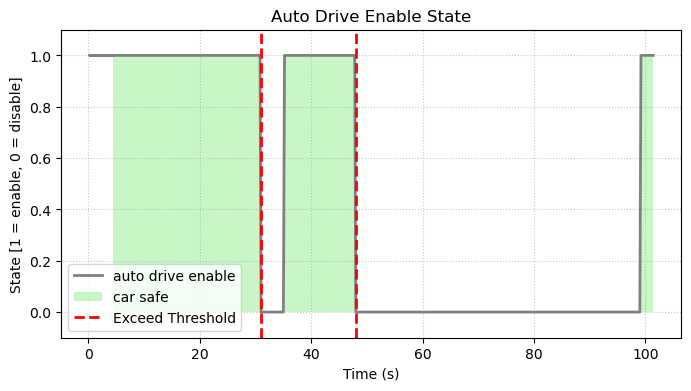

In [126]:
import matplotlib.pyplot as plt

# ─────────────────────────────────────────────
# (1) 데이터 파싱
t = []
R_total = []
fall = []
lf = data[0]["enable"]  # 초기 enable 상태
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
for d in data:
    t.append(d["t"])
    R_total.append(d["R_total"])
    if d["enable"] != lf:
        fall.append(d["t"])
    lf = d["enable"]

# 마지막 구간이 짝수 개가 되도록 처리 (끝까지 실패 상태라면 t[-1] 추가)
if len(fall) % 2 != 0:
    fall.append(t[-1])

th = 5  # 임계값

plt.figure(figsize=(16, 8))
plt.plot(t, R_total, label="R", color="black")

# ─────────────────────────────────────────────
# (2) 실패 구간별로 부분 음영 표시
car_shutdown_label_used = False   # 'car shutdown time' 범례를 한 번만 달기 위한 플래그
sensor_fall_label_used = False    # 'sensor fall' 범례를 한 번만 달기 위한 플래그

for i in range(0, len(fall), 2):
    fail_start = fall[i]
    if i + 1 < len(fall):
        fail_end = fall[i+1]
    else:
        fail_end = t[-1]

    # (2-1) 센서 폴 점선: 실패 시작 시점에 표시
    if not sensor_fall_label_used:
        plt.axvline(x=fail_start, color='red', linestyle='--', label='sensor fall')
        sensor_fall_label_used = True
    else:
        plt.axvline(x=fail_start, color='red', linestyle='--')

    # (2-2) 이 실패 구간의 인덱스들
    indices = [idx for idx, tv in enumerate(t) if fail_start <= tv <= fail_end]
    if not indices:
        continue

    # (2-3) R > th 인 구간만 부분적으로 음영 표시
    shading_in_progress = False
    shading_start = None

    for idx_i in range(len(indices)):
        idx = indices[idx_i]
        r_val = R_total[idx]

        # (a) R 값이 th 초과하고, 아직 음영 시작 안 했으면 시작
        if r_val > th and not shading_in_progress:
            shading_in_progress = True
            shading_start = t[idx]
        
        # (b) R 값이 th 이하로 내려갔고, 지금 음영 중이면 종료
        elif r_val <= th and shading_in_progress:
            shading_in_progress = False
            # 음영을 그리되, 처음 한 번만 라벨 달기
            if not car_shutdown_label_used:
                plt.axvspan(shading_start, t[idx], facecolor='red', alpha=0.3, label='car shutdown')
                car_shutdown_label_used = True
            else:
                plt.axvspan(shading_start, t[idx], facecolor='red', alpha=0.3)

    # (c) 구간 끝까지 R > th 상태가 이어진다면, fail_end까지 음영
    if shading_in_progress:
        if not car_shutdown_label_used:
            plt.axvspan(shading_start, fail_end, facecolor='red', alpha=0.3, label='car shutdown')
            car_shutdown_label_used = True
        else:
            plt.axvspan(shading_start, fail_end, facecolor='red', alpha=0.3)

# ─────────────────────────────────────────────
# (3) 임계값(th) 라인
plt.axhline(y=th, color='darkgray', linestyle='--', label='th')

plt.title("Sensor Failure based Shutdown Grpah")
plt.xlabel("Time (s)")
plt.ylabel("Risk")

plt.legend(loc='upper left')
plt.show()

# ─────────────────────────────────────────────
# auto 리스트 계산 (1이면 enable, 0이면 disable)
auto = np.array([1 if r < th else 0 for r in R_total])
t = np.array(t)

plt.figure(figsize=(8, 4))
plt.plot(t, auto, label="auto drive enable", color="grey", linewidth=2)

# auto가 1인 구간만 옅은 초록색으로 채우기 (step 방식으로 채움)
plt.fill_between(t, 0, auto, where=(auto==1), facecolor='lightgreen', alpha=0.5, step='pre',label='car safe')

flag=0
# 1에서 0으로 전환되는 구간에 빨간 점선 표시하기
# 즉, 이전 값이 1이고 다음 값이 0인 경우 해당 시점(t[i+1])에 axvline 추가
for i in range(len(auto)-1):
    if auto[i] == 1 and auto[i+1] == 0:
        if flag==0:
            plt.axvline(x=t[i+1], color='red', linestyle='--', linewidth=2,label='Exceed Threshold')
            flag=1
        else:
            plt.axvline(x=t[i+1], color='red', linestyle='--', linewidth=2)

plt.xlabel("Time (s)")
plt.ylabel("State [1 = enable, 0 = disable]")
plt.ylim(-0.1, 1.1)
plt.legend(loc='lower left')
plt.grid(True, linestyle=':', alpha=0.7)
plt.title("Auto Drive Enable State")
plt.show()